<H1>Prediccion de strimers en crecimiento en Twitch con Machine Learning

<img src='https://techcrunch.com/wp-content/uploads/2020/01/twitch-2019.jpg' width=700 height=700></img>

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twitchdata/twitchdata.csv


In [ ]:
df=pd.read_csv('/kaggle/input/twitchdata/twitchdata.csv')
df.head()

Channel  Watch time(hours)  Stream time(hours)  Peak viewers  \
0     xQcOW         6196161750              215250        222720   
1  summit1g         6091677300              211845        310998   
2    Gaules         5644590915              515280        387315   
3  ESL_CSGO         3970318140              517740        300575   
4      Tfue         3671000070              123660        285644   

   Average viewers  Followers  Followers gained  Views gained  Partnered  \
0            27716    3246298           1734810      93036735       True   
1            25610    5310163           1370184      89705964       True   
2            10976    1767635           1023779     102611607       True   
3             7714    3944850            703986     106546942       True   
4            29602    8938903           2068424      78998587       True   

   Mature    Language  
0   False     English  
1   False     English  
2    True  Portuguese  
3   False     English  
4   False     English

We'll start by generating Pandas profiling report first,because then it becomes clear which areas to focus on in manual EDA

In [ ]:
report=pp.ProfileReport(df)

In [ ]:
report

### Lets see how many of these twitch streamers are under the age of 18..

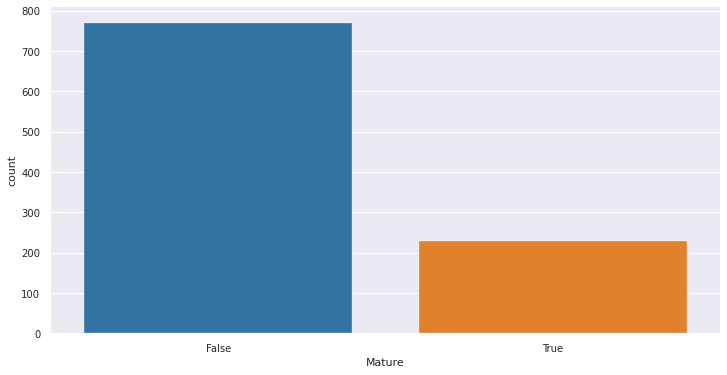

In [ ]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(x="Mature", data=df,order=df['Mature'].value_counts().index)

- As expected the number of twitch streamer below the age of 18 are more than three times the number of twitch streamers above the age of 18.
- It can be explained from the fact that millenials these days are finding new ways to earn income,rather than the traditional way of doing education and doing jobs.

### Lets see twitch streamers of different languages.

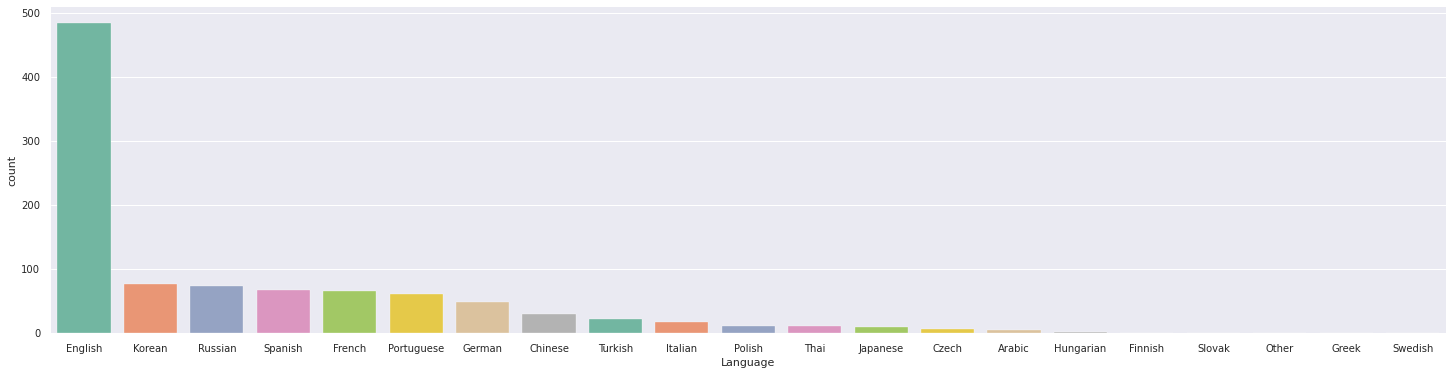

In [ ]:
plt.figure(figsize=(25, 6))
plot = sns.countplot(x="Language", data=df,order=df['Language'].value_counts().index, palette="Set2")

- Due to rise of Korean twitch streamers like LCK_Korea,갱생레바, 우왁굳,서새봄냥 and many more ,Twitch Korea has gained considerable popularities in the world being the second most popular language after english on twitch platform.
- Korean was followed by Russian and Then Spanish in favourite language of streaming.
- I was really surprised on chinese population being really low considering their population size.

# Is parternering with Brands/Twitch beneficial??

#### 1. Comparing wrt Views gained.

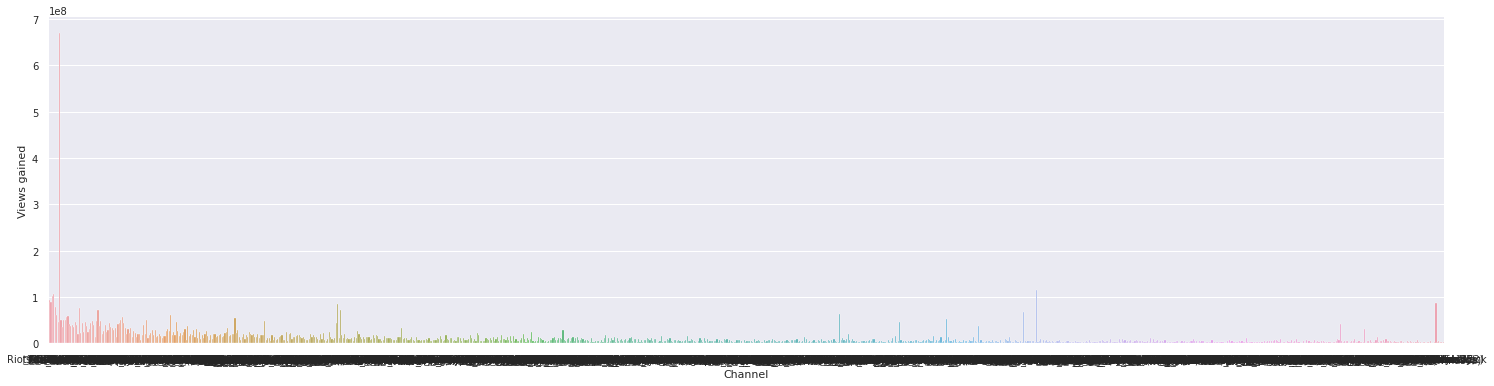

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == True]['Channel'], y=df[df.Partnered == True]['Views gained'],order=df[df.Partnered == True]['Channel'])
plt.show()

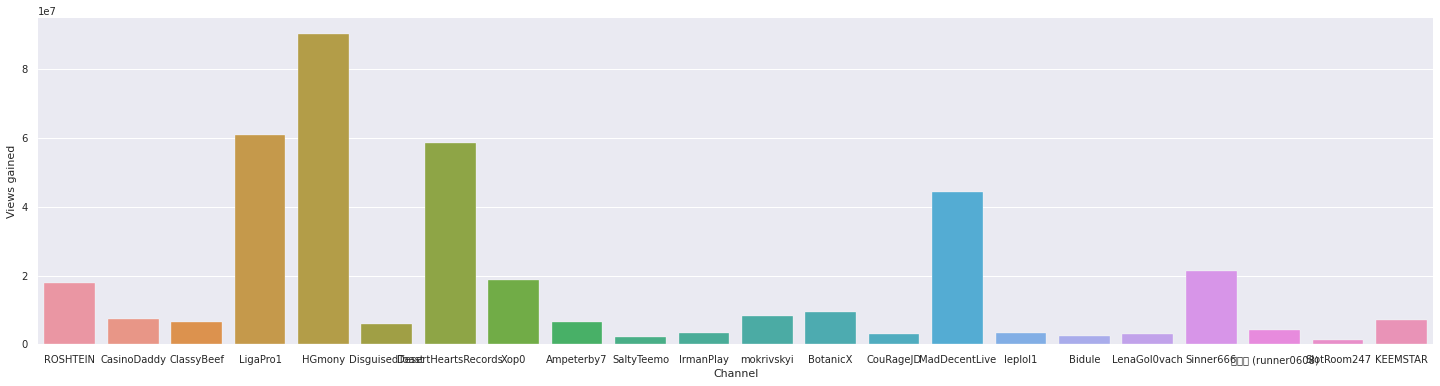

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == False]['Channel'] , y=df[df.Partnered == False]['Views gained'],order=df[df.Partnered == False]['Channel'])
plt.show()

__NOTE__-If you notice carefully both the graphs above have different scales.

#### 2.Comparing the number of followers.

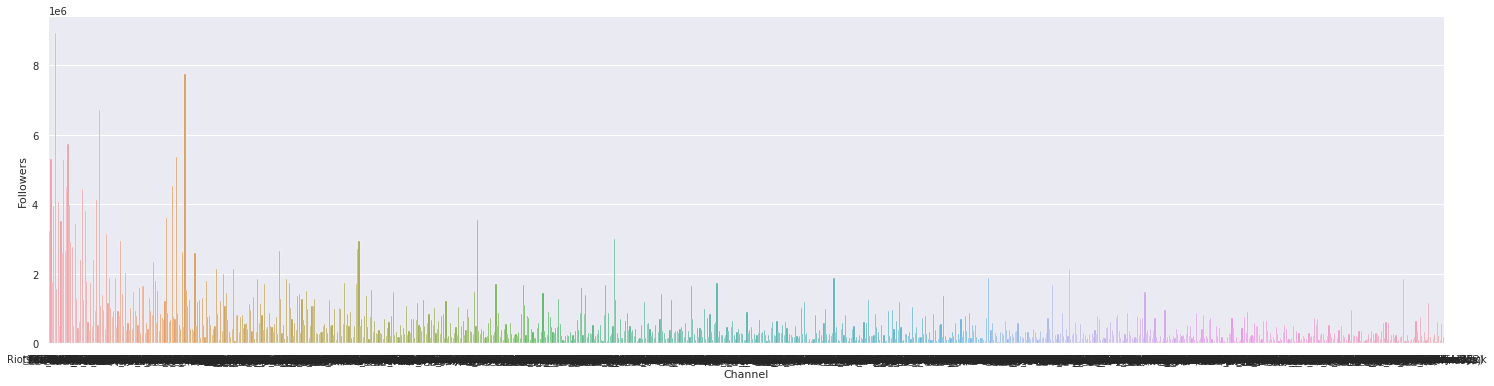

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == True]['Channel'] , y=df[df.Partnered == True]['Followers'],order=df[df.Partnered == True]['Channel'])
plt.show()

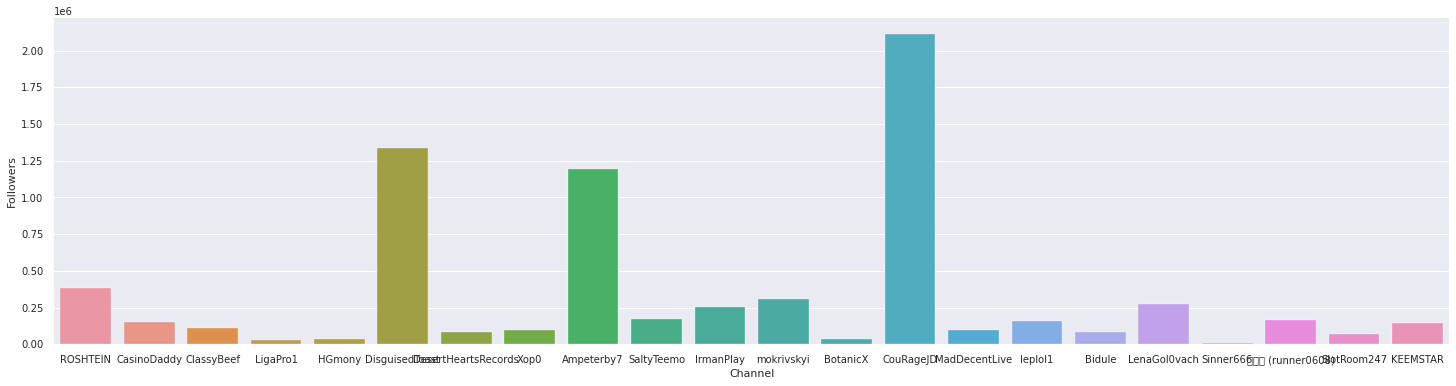

In [ ]:
plt.figure(figsize=(25,6))
sns.barplot(x=df[df.Partnered == False]['Channel'] , y=df[df.Partnered == False]['Followers'],order=df[df.Partnered == False]['Channel'])
plt.show()

## Some observations wrt to the above two graphs
- Partnering with brands/twitch is really helpful and benefecial for your channel growth.
- It is observed that the partnered channels have ten times more views than the non-partnered ones.
- The Median value of Partnered channel views are even more than the highest number of views of non-partnered channels.
- In followers,there is a difference b/w partnered and non-patnered channels but the difference is not as prominent as seen in the views gained.
- The above problem can be explained from the fact that not every view of kaggle notebook turns into a upvote.Kaggle notebook usually have a large difference between the number of views and the number of upvotes they have.
- But the problem is there are a large number of partenred channels leading to immense competetion on the platform.

# Comparing Top 50 channels on the basis of viewers and watch time 

In [ ]:
def createbarplot(xname,yname,dataframe):
    plt.figure(figsize=(30,10))
    sns.barplot(x=xname , y=yname,data=dataframe.iloc[:50,:] ,order=yname)
    plt.show()

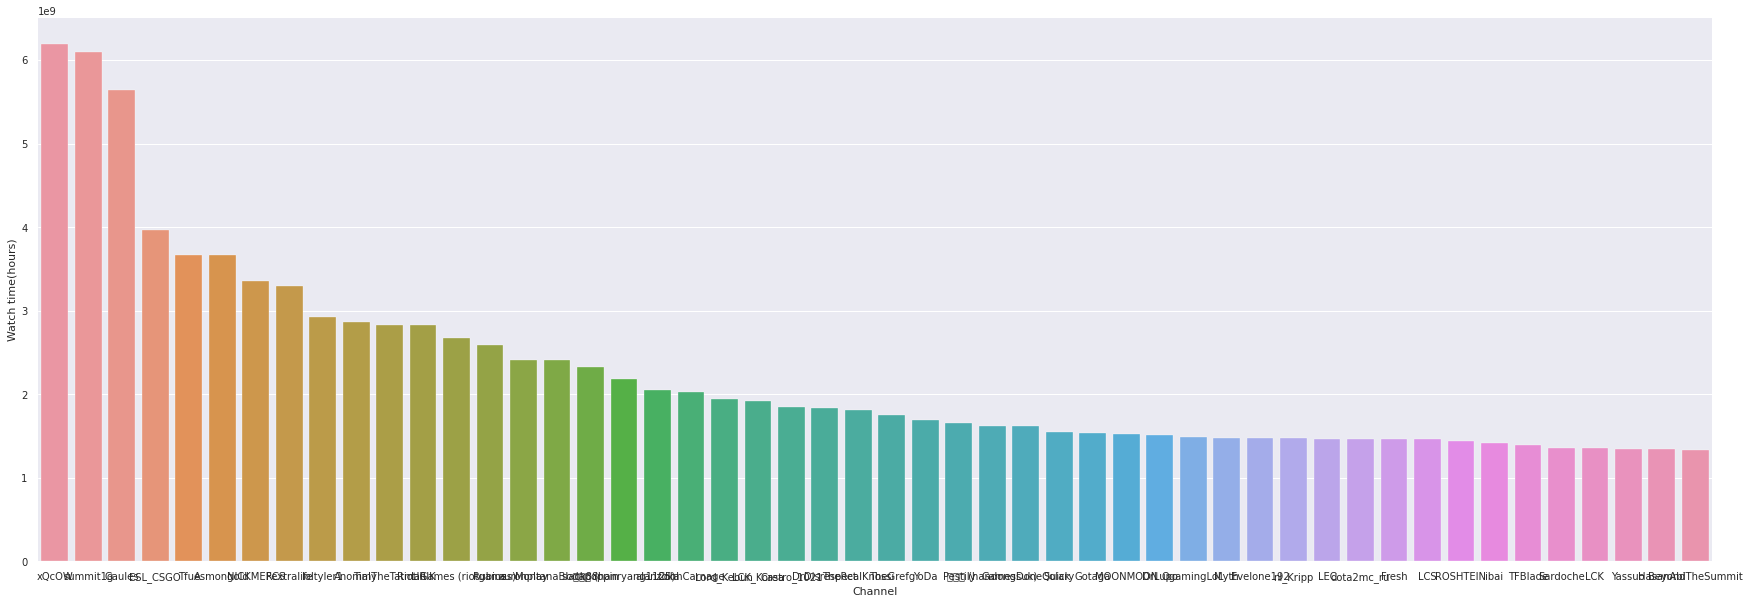

In [ ]:
createplot('Channel','Watch time(hours)',df.copy())

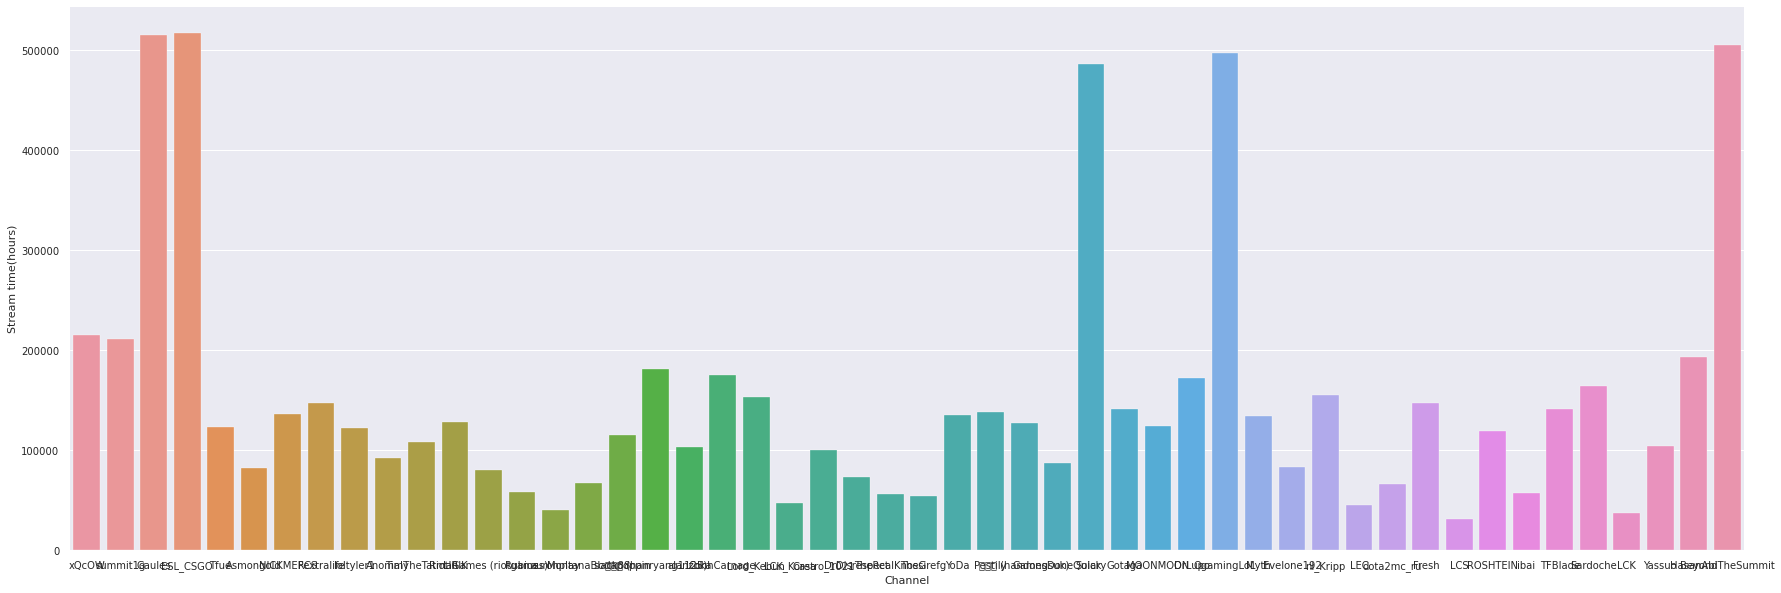

In [ ]:
createplot('Channel','Stream time(hours)',df.copy())

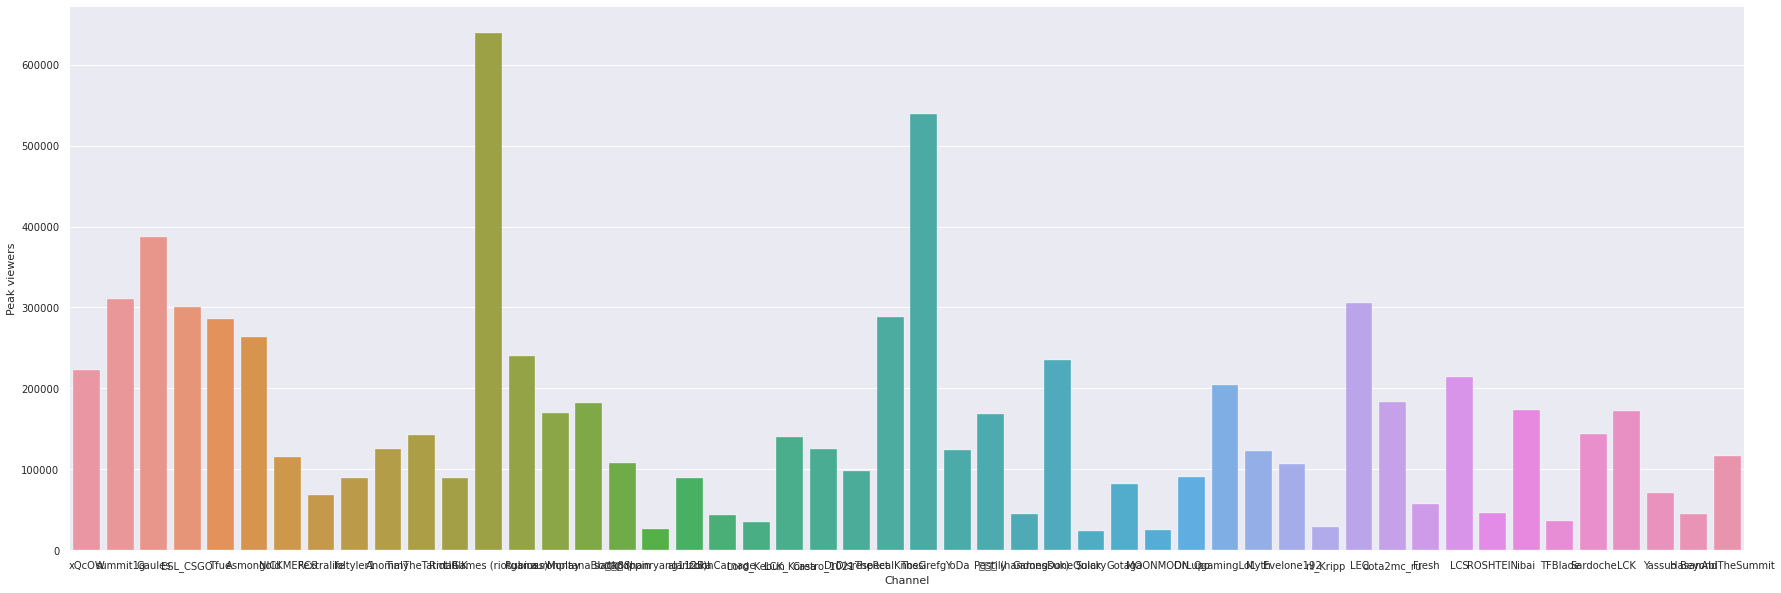

In [ ]:
createplot('Channel','Peak viewers',df.copy())

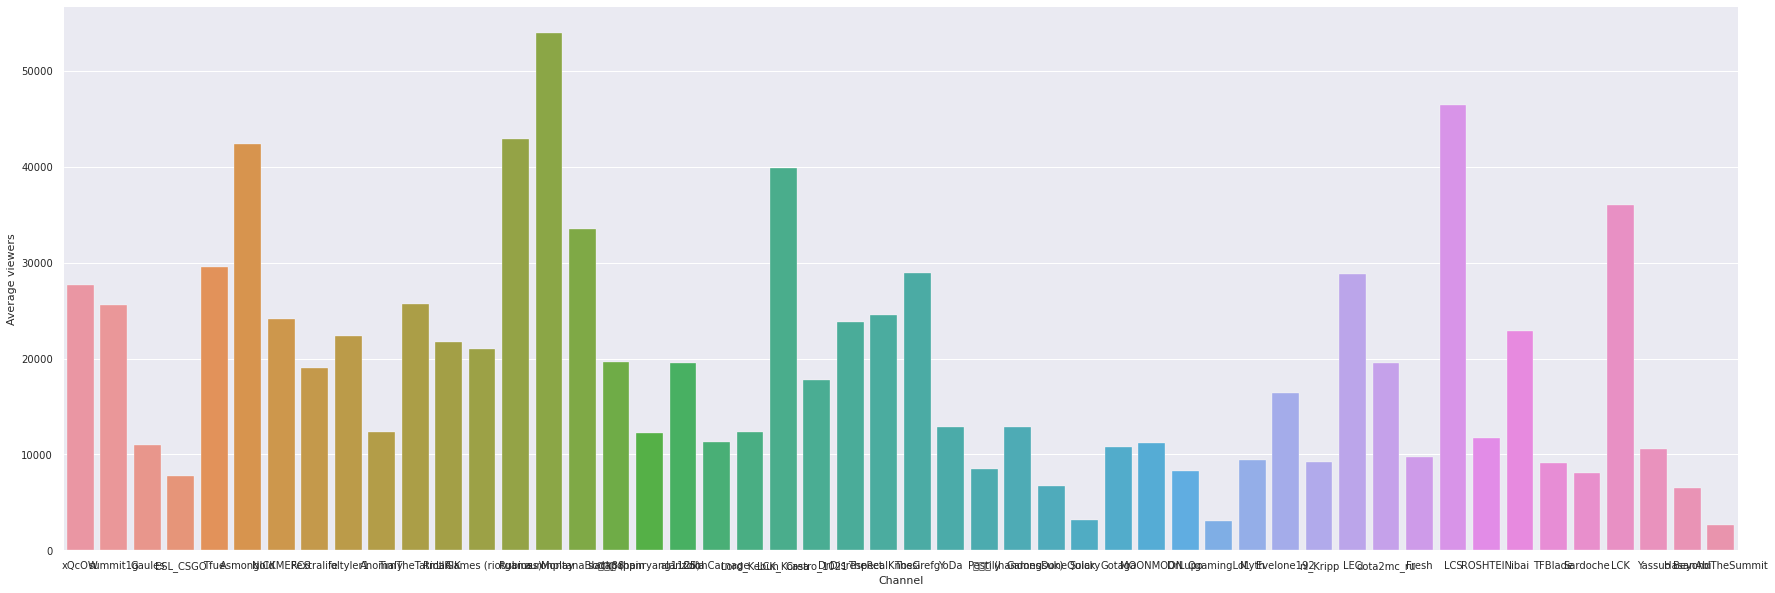

In [ ]:
createplot('Channel','Average viewers',df.copy())

Finally,we can see their is no clear top twitch streamer,but we do have a list of best twitch streamers in the world,which includes:
- Turner “TFue” Tenney.
- NICKMERCS.
- Tyler1.
- Clix.
- TSM Myth.
- Cloakzy.
- Symfuhny.
- Bugha.

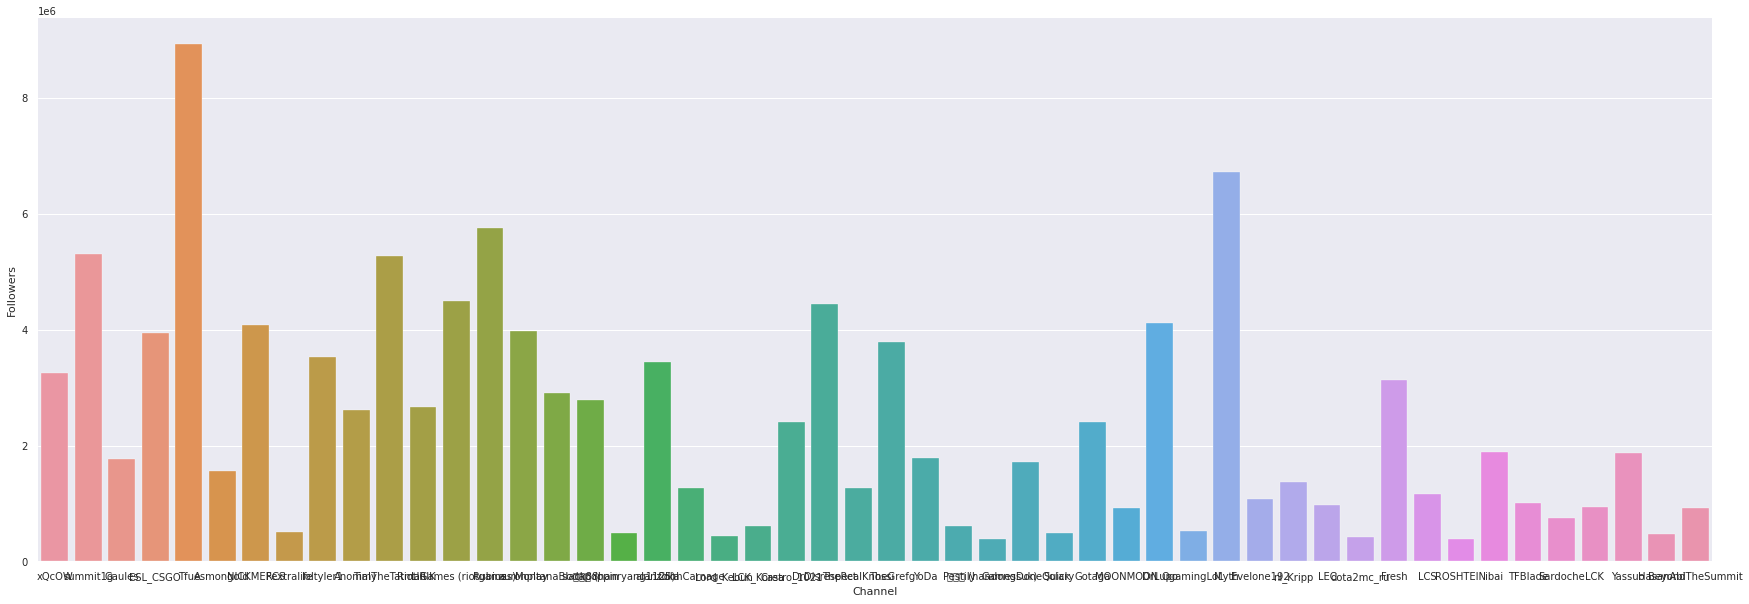

In [ ]:
createplot('Channel','Followers',df.copy())

Los mejores Strimers en cuanto a followers:
1. Tfue — 7.01 million followers.
2. shroud — 6.45 million followers. ...
3. TSM| Myth — 5.1 million followers. ...
4. dakotaz — 4.08 million followers. ...
5. Riot Games — 4.07 million followers. ...
6. Tim the Tatman — 4.04 million followers. ...
7. Summit1g — 3.97 million followers.